# Homework 2

## Taeho Hwang

Instructions: 

 1. Please replace "Yourname" above, and in the title / filename of this notebook. 
 2. Import all the libraries you end up using in the cell below. Please only use those libraries which we have used in class (i.e. nltk, collections, pandas, etc.). 
 3. Complete all the exercises, replacing "enter code here" with your code, and "enter markdown here" with your markdown. Annotate your code with markdown cells, to explain what you're doing, and interpret your results.  
 4. From the Kernel menu, select "restart and run all." This will help me to see the output of your answers. 
 5. Email me your completed notebook: jonathan.reeve@columbia.edu


In [1]:
# Import all your libraries here. 
import nltk
import collections
import pandas as pd
import re
from nltk.tokenize import word_tokenize

### 1. Split *The Moonstone* into a dictionary which represents the text of its narrators. 

The dictionary's keys should be the narrators' names, and the values should be the text of that narration. Keep in mind that some narrators have two narrations, as with Betteredge and Franklin Blake. You'll have to concatenate those. 

Your data structure should be called something like `moonstoneNarrators`. You should be able to run something like this:

```python
moonstoneNarrators["Miss Clack"]
```

and it should output text beginning: "Contributed by Miss Clack; niece of the late Sir John Verinder." Similarly, you should be able to run:

```python
moonstoneNarrators["Franklin Blake"]
```

and it will output text beginning "Contributed by Franklin Blake" but which also contains
"The Story Resumed by Franklin Blake ..." 

Demonstrate that your dictionary works, by printing out the first 200 or so characters of each narration. **Nota bene**: Please do not print out the entire contents of a narration, as that will make your notebook very difficult to read and grade. 

In [2]:
moonstoneNarrators = {"Miss Clack" : "",
             "Mathew Bruff": "",
             "Franklin Blake": "",
             "Ezra Jennings": "",
             "Sergeant Cuff": "",
             "Mr. Candy": "",
             "Gabriel Betteredge": ""
            }

with open("/Users/hwangyun/Desktop/course-computational-literary-analysis/Texts/moonstone.md", "r") as f:
    moonstone = f.read()
    moonstoneChapter = re.split('## [a-zA-Z]* Period', moonstone)
    #print(moonstoneChapter[2])
    chapterNarrative = re.split('## [a-zA-Z]* Narrative', moonstoneChapter[2])
    moonstoneNarrators["Gabriel Betteredge"] += moonstoneChapter[1]
    for index in range(1, len(chapterNarrative)):
        for narrator in moonstoneNarrators:
            if narrator.lower() in chapterNarrative[index][:50].strip().split('\n')[0].lower():
                moonstoneNarrators[narrator] += chapterNarrative[index]
                break


for narrator, story in moonstoneNarrators.items():
    print(narrator, " : \n", story[:200], "\n"* 3)

Miss Clack  : 
 

Contributed by MISS CLACK; niece of the late SIR JOHN VERINDER

### Chapter I

I am indebted to my dear parents (both now in heaven) for having had
habits of order and regularity instilled into me a 



Mathew Bruff  : 
 

Contributed by MATHEW BRUFF, Solicitor, of Gray’s Inn Square

### Chapter I

My fair friend, Miss Clack, having laid down the pen, there are two
reasons for my taking it up next, in my turn.

In the 



Franklin Blake  : 
 

Contributed by FRANKLIN BLAKE

### Chapter I

In the spring of the year eighteen hundred and forty-nine I was
wandering in the East, and had then recently altered the travelling
plans which I had la 



Ezra Jennings  : 
 

Extracted from the Journal of EZRA JENNINGS

1849.–June 15…. With some interruption from patients, and some
interruption from pain, I finished my letter to Miss Verinder in time
for to-day’s post. I 



Sergeant Cuff  : 
 

Contributed by SERGEANT CUFF

### Chapter I

Dorking, Surrey, July 30th, 1849. To Fran

## How to solve #1

```python
moonstoneNarrators = {"Miss Clack" : "",
             "Mathew Bruff": "",
             "Franklin Blake": "",
             "Ezra Jennings": "",
             "Sergeant Cuff": "",
             "Mr. Candy": "",
             "Gabriel Betteredge": ""
            }
 ```
 
* At first, I made a dictionary which keys are narrators.

```python
with open("/Users/hwangyun/Desktop/course-computational-literary-analysis/Texts/moonstone.md", "r") as f:
    moonstone = f.read()
    moonstoneChapter = re.split('## [a-zA-Z]* Period', moonstone)
    chapterNarrative = re.split('## [a-zA-Z]* Narrative', moonstoneChapter[2])
    moonstoneNarrators["Gabriel Betteredge"] += moonstoneChapter[1]
    for index in range(1, len(chapterNarrative)):
        for narrator in moonstoneNarrators:
            if narrator.lower() in chapterNarrative[index][:50].strip().split('\n')[0].lower():
                moonstoneNarrators[narrator] += chapterNarrative[index]
                break

```
* I opened the moonstone text file. Using regular expression, I split by a period. The first chapter is all about Betteredge, so I added it right away.Then I split the period into chapter. Whether the narrator was included was examined through an if statement. If a narrator is included, I added a string to the dict using it as a key.
  
for narrator, story in moonstoneNarrators.items():
    print(narrator, " : \n", story[:200], "\n"* 3)

* I printed the moonstone's Narrators story. It worked well.

### 2. Using your dictionary from #1, make a new dictionary where those texts are lowercased and tokenized. 

The new dictionary's keys should still be the narrator's names, and the values should be a list of lowercased tokens for that narration. Call it something like `moonstoneNarratorsTokens`. 

You should be able to run this: 

```python
moonstoneNarratorsTokens["Miss Clack"]
```

and it should output a list beginning: `['contributed', 'by', 'miss', 'clack', ';' ... ]`

Hint: Use a `for` loop and the NLTK's word tokenizing function. 

In [3]:
moonstoneNarratorsTokens = {k: list() for k in moonstoneNarrators}
for k, v in moonstoneNarrators.items():
    moonstoneNarratorsTokens[k] = word_tokenize(v.lower())
#print(moonstoneNarratorsTokens)

### 3. Using your dictionary from #2, create a new dictionary containing NLTK `Text()` objects for each narrator. 

The new dictionary's keys should still be narrator names, and the values should be nltk Text() objects. Call it something like `moonstoneNarratorsTexts`. 

You should be able to run this: 

```python
moonstoneNarratorsTexts["Miss Clack"].collocations()
```

And it should give a list of common collocations for Miss Clack's narrative. 

In [4]:
nltk.download('stopwords')
moonstoneNarratorsTexts = {k: list() for k in moonstoneNarrators}
for key, token in moonstoneNarratorsTokens.items():
    moonstoneNarratorsTexts[key] = nltk.Text(token, name=key)  
    
 
moonstoneNarratorsTexts["Miss Clack"].collocation_list()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hwangyun/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('mr.', 'godfrey'),
 ('mr.', 'bruff'),
 ('miss', 'clack'),
 ('lady', 'verinder'),
 ('mr.', 'luker'),
 ('mr.', 'ablewhite'),
 ('franklin', 'blake'),
 ('montagu', 'square'),
 ('jane', 'ann'),
 ('miss', 'verinder'),
 ('northumberland', 'street'),
 ('ann', 'stamper'),
 ('godfrey', 'ablewhite'),
 ('miss', 'jane'),
 ('precious', 'publications'),
 ('aunt', 'ablewhite'),
 ('fallen', 'nature'),
 ('christian', 'hero'),
 ('sound', 'doctrine'),
 ('mr.', 'franklin')]

### 4. Using your dictionary from #2 or #3, calculate the lengths, in words, of the text of each narrator. 

In [5]:
for k, v in moonstoneNarratorsTokens.items():
    length = 0
    for token in moonstoneNarratorsTokens[k]:
        #print(token)
        length += len(token)
    print(k, "length : ", length)

Miss Clack length :  138583
Mathew Bruff length :  46769
Franklin Blake length :  224435
Ezra Jennings length :  65186
Sergeant Cuff length :  20396
Mr. Candy length :  3485
Gabriel Betteredge length :  364660


### 5. Using your dictionary from #3, find the common collocations for each narrator. 

Then, in the markdown cell below, write about what you notice about these. 

In [6]:
collocationList = {k: list() for k in moonstoneNarrators}
for narrator in moonstoneNarratorsTexts:
    tempList = moonstoneNarratorsTexts[narrator].collocation_list()
    for t in tempList:
        collocationList[narrator].append(t)
    collocationList[narrator] = set(collocationList[narrator])

for key, value in collocationList.items():
    for key2, value2 in collocationList.items():
        if key == key2:
            continue
        print(key, "and", key2, "common collocation :\n ", value & value2)
        print()
    print()


Miss Clack and Mathew Bruff common collocation :
  {('lady', 'verinder'), ('miss', 'verinder'), ('mr.', 'luker'), ('godfrey', 'ablewhite'), ('franklin', 'blake'), ('miss', 'clack'), ('mr.', 'godfrey'), ('mr.', 'bruff'), ('mr.', 'franklin')}

Miss Clack and Franklin Blake common collocation :
  {('lady', 'verinder'), ('miss', 'verinder'), ('mr.', 'luker'), ('godfrey', 'ablewhite'), ('franklin', 'blake'), ('mr.', 'bruff'), ('mr.', 'franklin')}

Miss Clack and Ezra Jennings common collocation :
  {('franklin', 'blake'), ('miss', 'verinder'), ('mr.', 'bruff'), ('mr.', 'franklin')}

Miss Clack and Sergeant Cuff common collocation :
  {('mr.', 'godfrey'), ('miss', 'verinder'), ('mr.', 'luker'), ('godfrey', 'ablewhite')}

Miss Clack and Mr. Candy common collocation :
  {('franklin', 'blake'), ('miss', 'verinder'), ('mr.', 'franklin')}

Miss Clack and Gabriel Betteredge common collocation :
  {('mr.', 'godfrey'), ('franklin', 'blake'), ('miss', 'verinder'), ('mr.', 'franklin')}


Mathew Bruff 

* Usually, when there was a common collocation, it was often a person's name. Through this, it will be possible to predict the person who knows in common between the two characters. As mentioned earlier, it is expected that the relationship between characters can be expressed in a graph.

### 6. Using your dictionary from #3, find the hapax legomena for each narrator. 

Then, in the markdown cell below, write about what you notice about those. 

In [7]:
from nltk.probability import FreqDist

for narrator in moonstoneNarratorsTexts:

    print(narrator, ":\n", FreqDist(moonstoneNarratorsTexts[narrator]).hapaxes()[:200])
    print()


Miss Clack :
 ['contributed', 'regularity', 'instilled', 'bygone', 'article', 'clothing', 'retiring', 'entry', 'preceded', 'hymn.', 'sad', 'meditations', 'slumbers', 'haunt', 'uneasy', 'pillow', 'links', 'childhood–before', 'papa', 'latter', 'habit–hitherto', 'mainly', 'adam–has', 'enabled', 'caprice', 'cut', 'isolated', 'infrequently', 'brittany', 'inhabited', 'advantages', 'protestant', 'cheap', 'market', 'retirement–a', 'patmos', 'amid', 'howling', 'ocean', 'popery', 'surrounds', 'us–a', 'insignificant', 'existence', 'relative–would', 'spiritually-wealthy', '–writes', 'disguising', 'wants', 'whim', 'stir', 'remuneration', 'me–with', 're-open', 'recall', 'intensely', 'remembrances–and', 'compensated', 'laceration', 'humility', 'conquered', 'self-denial', 'doubt–pray', 'grossest', '–if', 'honestly', 'labourer', 'forgives', 'thanks', 'suppress', 'flattering', 'purchased', 'wealth', 'blake.–miss', 'altered', 'writers', 'peculiarities', 'treatment', 'mark', 'literary', 'disfigure', 'narr

* Hapax legomena is a word that appears only once in the writing. It's not worth it, so I think it's okay to remove it from the writing. Since it does not play an important role in writing, it would be better to remove it in the preprocessing process and perform natural language processing.

### 7. Write a function that computes the type / token ratio for a text. Then, use the function, and the dictionary you made in #2, to compute the type/token ratios for samples from all the narrators. 

Truncate each text to some pre-determined value, first, before calculating its type/token ratio, so that you're comparing the same amount of words in each. 

Then, in the markdown cell below, write 1-2 paragraphs where you interpret your results. 

In [8]:
def getTypeTokenRatio(string):
    tokens = word_tokenize(string)
    return len(set(tokens)) / len(tokens)

def cleanString(string):
    string = re.sub('[^a-zA-Z0-9]',' ',string).strip()
    return string

for narrator, string in moonstoneNarrators.items():
    string = cleanString(string)
    print(narrator, "'s the type / token ratio :", getTypeTokenRatio(string))

Miss Clack 's the type / token ratio : 0.1308147005911077
Mathew Bruff 's the type / token ratio : 0.19221619564183082
Franklin Blake 's the type / token ratio : 0.09270224546293448
Ezra Jennings 's the type / token ratio : 0.1649705409748259
Sergeant Cuff 's the type / token ratio : 0.26610395379831187
Mr. Candy 's the type / token ratio : 0.44471153846153844
Gabriel Betteredge 's the type / token ratio : 0.07271448328484906


* The type/talken ratio represents the variety of characters' vocabulary. It is an indicator that calculates how many different words are used.

* The following meaningful information can be extracted through type/talken ratio.

1. When a person uses various words, it can be said that the person deals with various topics. It uses various words because it deals with various events. Looking at Betteredge, which deals with many cases, it can be seen that the figure is 0.07271448328484906, which uses a wide variety of words.

2. It will be able to express how much a person has learned. A person with a lot of education would have gotten more vocabulary. It can be seen that Franklin Blank, who has received relatively much education, uses various words as 0.09270224546293448. By comparison, Mr Candy's does not use various words.

### 8. Write a function that computes the average number of words per sentence, for a text. Then, use your function, and your dictionary from #1, to calculate the average sentence length, in words, for all the narrators. 

Then, in the markdown cell below, describe what you think this might indicate, and how it compares to type/token ratio. 

Hint: use the NLTK's sentence tokenizing function. 

In [9]:
def getAvgSentenceLength(string):
    stringList = string.split('.')
    cnt = 0
    tokenCount = 0
    for s in stringList:
        tokens = word_tokenize(s)
        #print(tokens)
        tokenCount += len(tokens)
        cnt +=1
    return tokenCount / cnt

for key, value in moonstoneNarrators.items():
    print(key, ":", getAvgSentenceLength(value))
    

Miss Clack : 19.15989010989011
Mathew Bruff : 21.233695652173914
Franklin Blake : 19.261811023622048
Ezra Jennings : 15.918582375478927
Sergeant Cuff : 18.51851851851852
Mr. Candy : 12.777777777777779
Gabriel Betteredge : 20.233411563900148


* The type/token ratio and average number of words perception seem quite relevant.
* If the average number of words per sentence is large, the type/token ratio is small, and if the type/token ratio is small, the average number of words per sentence is large.
* Maybe it's because vocabulary and writing many words in sentences have a relationship.

### 9. Choose a motif that you notice in _The Moonstone_. Choose around 3-5 words (or tokens, stems, or lemmas) that you think represent this motif. Create a plot to show the positions of these words in the narrative time of _The Moonstone_. Then create concordances for a few of these words. Finally, in 2-3 paragraphs of well-formatted markdown, describe what this tells you about how the motif operates in the novel. 

<Text: layout narrative title the moonstone author wilkie collins...>


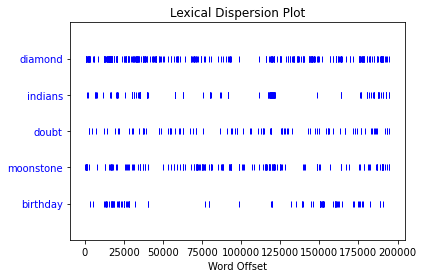

Displaying 25 of 324 matches:
t applying however as in india to a diamond devoted to the service of a god but
n time the adventures of the yellow diamond begin with the eleventh century of 
 inviolate deity bearing the yellow diamond in its forehead was removed by nigh
d the breath of his divinity on the diamond in the forehead of the god and the 
he eighteenth christian century the diamond fell into the possession of tippoo 
boastful way that we should see the diamond on his finger if the english army t
out among them and the story of the diamond turned up again unexpectedly in the
en taunted more than once about the diamond by those who recollect his angry ou
l live to regret it if he keeps the diamond and that others will live to regret
 taking it from him if he gives the diamond away the story first period the los
 story first period the loss of the diamond 1848 the events related by gabriel 
n talking of the loss of the indian diamond in my aunts house in yorkshire two 
nklin went

In [10]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english')) 
out = re.sub(r'[^\w\s]','',moonstone)
filtered = word_tokenize(out.lower())
result = []
for w in filtered: 
    if w not in stop_words: 
        result.append(w) 
counts = collections.Counter(result)
#print(counts)
#choose 'Diamond', 'Indians', 'doubt', 'Moonstone', 'birthday'
text = nltk.Text(filtered)
print(text)
text.dispersion_plot(['diamond', 'indians', 'doubt', 'moonstone', 'birthday'])
text.concordance('diamond')
text.concordance('doubt')
text.concordance('indians')

 - '*Diamonds*' are the center of the story. I can see that diamonds continue to appear throughout the story. 
 - The storyline first began with '*birthday*', but over time, the word *birthday* did not appear much in the middle of the event because it was not important, but because the event of the loss of the diamond was important.
 - As it is a detective novel, the word '*doubt*' appeared steadily. It means a relationship in which characters suspect each other. It's a very interesting phenomenon.

### 10. Write a program to determine whose name appears in the most number of paragraphs with the lemmas "moonstone" and "diamond." Then, in a markdown cell, describe anything you might notice about your results. 

Here's one way you might do this: 
 - Make a list of names we've encountered in the novel so far. (Be careful to include both "Rachel" and "Miss Verinder," for instance.) 
 - Break the novel into paragraphs by splitting on double line breaks (`\n\n`). 
 - Tokenize each paragraph. 
 - Test for the presence of a word using the `in` keyword for lists. 
 - Maintain a dictionary for each character, where the key is the character's name, and the value is a tally of how many times their name has appeared in the same paragraph as "moonstone" and "diamond." 

In [11]:
characterAlias = {
    "Rachel": ["rachel", "verinder"],
    "Betteredge": ["betteredge", "gabriel"],
    "The Colonel": ["colonel", "john" ,"herncastle"],
    "Blake": ["franklin", "blake"],
    "Godfrey": ["godfrey", "ablewhite"],
    "Ezra": ["jennings", "ezra"],
    "Sergeant Cuff": ["cuff", "sergeant"],
    "Mr. Bruff": ['bruff'],
    "Mr. Candy": ['candy'],
    "Seegrave": ["superintendent", "seegrave"],
    "Mr. Murthwaite": ["murthwaite"],
    "Penelope": ["penelope"],
    "Samuel": ["samuel"],
    "Rosanna": ["rosanna", "spearman"],
    "wilkie collins": ["wilkie", "collins"]
}

characterCounter = {k: 0 for k in characterAlias}

paragraphs = moonstone.split("\n\n")
for char in characterCounter:    
    for p in paragraphs:
        tokens = word_tokenize(p.lower())  
        for character, alias in characterAlias.items():

            for a in alias:
                if a in tokens and ("moonstone" in tokens or "diamond" in tokens):
                    #print(character)
                    characterCounter[character] += 1




print(characterCounter)

{'Rachel': 1605, 'Betteredge': 630, 'The Colonel': 705, 'Blake': 1770, 'Godfrey': 705, 'Ezra': 225, 'Sergeant Cuff': 975, 'Mr. Bruff': 435, 'Mr. Candy': 105, 'Seegrave': 285, 'Mr. Murthwaite': 195, 'Penelope': 270, 'Samuel': 30, 'Rosanna': 660, 'wilkie collins': 30}


**Rachel** appeared a lot with diamonds. The reason is that the story begins with Rachel losing her diamond. **Blake** appeared a lot, too. Because he's a person who delivers diamonds. As the story progresses, if I look at the appearance of diamonds and characters in paragraphs, I can see who the story revolves around. And in this story, I can see the influence of each character. The more it's mentioned, the more it's a person who directly influencing the story.

### Bonus: Write a program to determine the words of *The Moonstone* that occur more often in sentences ending in exclamation marks. In a markdown cell, describe anything you notice in your results. 

Here's one way you might do this: 

 - Sentence-tokenize the novel.
 - Make two empty lists, one for exclamation-mark sentences, and one for other sentences. 
 - Write a `for` loop to go through each sentence, and append it to one of the two lists, depending on whether it contains an exclamation mark.
 - Join the lists together, using `" ".join(list)`, so that they're easier to word-tokenize. 
 - Word-tokenize each string. 
 - Make `Counter()` objects for the resulting list of word-tokens. 
 - Subtract one set of numbers from the other, to find the words that occur much more in one category than another. 
 - Sort the results using `sorted()`, according to the difference in frequencies between the two.

In [12]:
# Enter code here. 
from nltk.tokenize import sent_tokenize
from collections import Counter

exclamationMarkList = list()
otherSentencesList = list()

senTokens = sent_tokenize(moonstone.lower())
for sen in senTokens:
    if sen[-1] == "!":
        exclamationMarkList.append(sen)
    else:
        otherSentencesList.append(sen) 

onlyExclaimationString = " ".join(exclamationMarkList)
otherSentenceString = " ".join(otherSentencesList)

onlyExclaimationToken = word_tokenize(onlyExclaimationString)
otherSentenceToken = word_tokenize(otherSentenceString)

onlyExclaimationCounter = Counter(onlyExclaimationToken)
otherSentenceCounter = Counter(otherSentenceToken)

print(sorted(onlyExclaimationCounter - otherSentenceCounter))

['!', '19th.–another', '25th', 'about.', 'accuracy', 'adam–it', 'admit–that', 'age–never', 'ah', 'alas', 'amazing', 'anchored', 'angel', 'apparent', 'appointment.', 'are.', 'are–as', 'ask.', 'assassin', 'attempt–at', 'away.', 'aye', 'beings', 'benefits', 'bet', 'betteredge–until', 'bishops', 'bit–page', 'blake–nothing', 'blinding', 'boards', 'book–and', 'branded', 'break-down', 'breakfast-bell', 'bringing-up', 'bruff–on', 'buckles', 'burthen', 'business-life', 'but–ah', 'chair–oh', 'chaperones.', 'character–and', 'christendom', 'cistern–such', 'clapping', 'clergy', 'clergyman', 'cocks', 'coiled', 'combatants', 'compassionately', 'comprehension', 'conceive', 'conditional', 'confessions', 'congratulate', 'conjecture.', 'consequent', 'continuous', 'coward', 'credited', 'crimes', 'dart', 'dashing', 'daughter–i', 'day–try', 'dedicate', 'design', 'desire.', 'destitute', 'destroys', 'diamond–and', 'diamond–the', 'disappeared–and', 'disgusting', 'dissipation', 'disunited–the', 'doctors.', 'doc


- It's an interesting result. It is said that many exclamatory words, Aye, Ah, But-Ah, and chair-oh, appeared. Exclamation marks and exclamations are very closely related.
